In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import joblibimport os
import pickle

In [4]:
# Install required packages
!pip install pandas numpy scikit-learn xgboost matplotlib

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    -----------------------

In [ ]:
# Load the uploaded file
df = pd.read_csv('N:\data_science\merged_ovarian_data.csv')

# View basic info
print(df.head())
print(df.info())

   SUBJECT_ID    AFP     AG  Age   ALB   ALP   ALT   AST  BASO#  BASO%  ...  \
0           1   3.58  19.36   47  45.4  56.0  11.0  24.0   0.01   0.30  ...   
1           2  34.24  23.98   61  39.9  95.0   9.0  13.0   0.02   0.30  ...   
2           3   1.50  18.40   39  45.4  77.0   9.0  18.0   0.03   0.60  ...   
3           4   2.75  16.60   45  39.2  26.0  16.0  17.0   0.05   0.74  ...   
4           5   2.36  19.97   45  35.0  47.0  21.0  27.0   0.01   0.10  ...   

    PCT   PDW  PHOS    PLT   RBC   RDW  TBIL    TP     UA has_cancer  
0  0.09  13.4  1.46   74.0  2.64  13.7   5.5  73.9  396.4         No  
1  0.30  11.2  1.09  304.0  4.89  12.7   6.8  72.0  119.2         No  
2  0.13  15.2  0.97  112.0  4.62  12.0  14.8  77.9  209.2         No  
3  0.25  17.4  1.25  339.0  4.01  14.6  10.9  66.1  215.6         No  
4  0.28  11.9  0.94  272.0  4.40  13.4   5.3  66.5  206.0         No  

[5 rows x 52 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Da

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\NARASAREDDY\AppData\Local\Temp\ipykernel_21840\2282407228.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('N:\data_science\merged_ovarian_data.csv')


In [ ]:
# Fill numerical columns with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\NARASAREDDY\AppData\Local\Temp\ipykernel_21840\87662771.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Automatically encode categorical variables
df = pd.get_dummies(df)

In [34]:
# Create feature matrix X and target variable y
X = df.drop(['has_cancer_No', 'has_cancer_Yes'], axis=1)
y = df['has_cancer_Yes']  # Using 'Yes' as the positive class

# Print shapes to verify
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1349, 59)
Target shape: (1349,)


In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

n:\data_science\ven\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:55:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9222222222222223
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       246
           1       1.00      0.12      0.22        24

    accuracy                           0.92       270
   macro avg       0.96      0.56      0.59       270
weighted avg       0.93      0.92      0.89       270



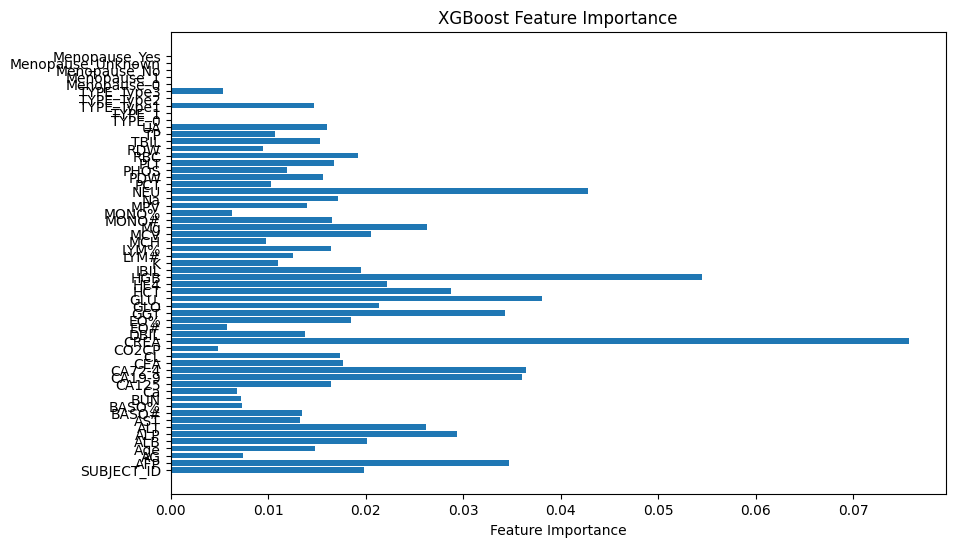

: 

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

In [ ]:
# Save models and create directories if needed
# Create models directory if it doesn't exist
model_dir = 'N:/data_science/models'
os.makedirs(model_dir, exist_ok=True)

# Save tabular model
model_path = os.path.join(model_dir, 'xgboost_model.pkl')
joblib.dump(model, model_path)
print(f"Saved tabular model to {model_path}")

# Save model columns 
columns_path = os.path.join(model_dir, 'model_columns.pkl')
with open(columns_path, 'wb') as f:
    pickle.dump(X.columns, f)
print(f"Saved columns to {columns_path}")

# Verify files exist
print("\nVerifying saved files:")
print(f"Tabular model exists: {os.path.exists(model_path)}")
print(f"Columns file exists: {os.path.exists(columns_path)}")

In [ ]:
def analyze_lab_results(lab_values):
    """Analyze laboratory results using the saved model"""
    try:
        # Load the saved model and columns
        model_dir = 'N:/data_science/models'
        model_path = os.path.join(model_dir, 'xgboost_model.pkl')
        columns_path = os.path.join(model_dir, 'model_columns.pkl')
        
        # Verify files exist
        if not os.path.exists(model_path):
            raise FileNotFoundError(f"Model file not found at {model_path}")
        if not os.path.exists(columns_path):
            raise FileNotFoundError(f"Columns file not found at {columns_path}")
            
        # Load model and columns
        model = joblib.load(model_path)
        with open(columns_path, 'rb') as f:
            model_columns = pickle.load(f)
            
        # Create DataFrame with input data
        df = pd.DataFrame([lab_values])
        
        # Ensure all required columns are present
        df_encoded = pd.get_dummies(df)
        df_encoded = df_encoded.reindex(columns=model_columns, fill_value=0)
        
        # Make prediction
        prediction = model.predict(df_encoded)[0]
        probability = model.predict_proba(df_encoded)[0][1]
        
        # Calculate risk level based on probability
        if probability < 0.3:
            risk_level = "Low Risk"
        elif probability < 0.7:
            risk_level = "Medium Risk"
        else:
            risk_level = "High Risk"
        
        return {
            'prediction': risk_level,
            'probability': f"{probability * 100:.1f}%",
            'status': 'success'
        }
        
    except Exception as e:
        print(f"Error in analyze_lab_results: {str(e)}")
        return {
            'prediction': None,
            'probability': None,
            'status': 'error',
            'message': str(e)
        }

# Test the function with sample data
sample_input = {
    'SUBJECT_ID': 999,
    'AFP': 2.5,
    'AG': 20.0,
    'Age': 45,
    'ALB': 42.0,
    'ALP': 70.0,
    'ALT': 15.0,
    'AST': 20.0,
    'BASO#': 0.02,
    'BASO%': 0.3,
    'TYPE': 0,
    'Menopause': 0,
    'PLT': 250
}

result = analyze_lab_results(sample_input)
if result['status'] == 'success':
    print("\nCancer Risk Assessment Results")
    print("============================")
    print(f"Risk Level: {result['prediction']}")
    print(f"Probability: {result['probability']}")
else:
    print("\nError in Analysis:")
    print(f"Message: {result['message']}")